In [1]:
import os

In [5]:
Root='/content/drive/MyDrive/Deep Learning 19MAM65'
os.chdir(Root)

In [6]:
pwd

'/content/drive/MyDrive/Deep Learning 19MAM65'

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.models import Sequential
import cv2
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense
from pathlib import Path
from tensorflow.keras.preprocessing import image

In [9]:
data_dir_train='/content/drive/MyDrive/Deep Learning 19MAM65/Ex2 /Gender classification'
female_dir = '/content/drive/MyDrive/Deep Learning 19MAM65/Ex2 /Gender classification/Female'
male_dir = '/content/drive/MyDrive/Deep Learning 19MAM65/Ex2 /Gender classification/Male'

In [10]:
print(tf.__version__)

2.8.0


In [11]:
batch_size = 32
img_height = 224
img_width = 224

In [12]:
#train_ds = ##todo
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 43 files belonging to 2 classes.
Using 35 files for training.


In [13]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        validation_split=0.20)

training_set = train_datagen.flow_from_directory(data_dir_train,
                                                 target_size = (img_height, img_width),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',subset='training')

val_set = train_datagen.flow_from_directory(data_dir_train,
                                          target_size = (img_height, img_width),
                                          batch_size = batch_size,
                                          class_mode = 'categorical',subset='validation')

Found 35 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


# MODEL 1

In [15]:
from keras.layers.advanced_activations import LeakyReLU
model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(224, 224, 3)))
model1.add(LeakyReLU(0.1))
model1.add(Conv2D(filters=16, kernel_size=3,padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64, kernel_size=(3,3),  padding="same"))
model1.add(LeakyReLU(0.1))

model1.add(Flatten())
model1.add(Dense(50))
model1.add(LeakyReLU(0.1))
model1.add(Dropout(0.2))
model1.add(Dense(2, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      9280      
                                                        

In [16]:
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [17]:
model = model1.fit_generator(training_set,
                         epochs = 50,
                         validation_data = val_set,
                         steps_per_epoch=2
                         )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/50
2/2 [==============================] - 21s 9s/step - loss: 23.5332 - accuracy: 0.3714 - val_loss: 49.5077 - val_accuracy: 0.6250
Epoch 2/50
2/2 [==============================] - 7s 6s/step - loss: 17.6252 - accuracy: 0.3714 - val_loss: 20.2658 - val_accuracy: 0.6250
Epoch 3/50
2/2 [==============================] - 9s 9s/step - loss: 3.2777 - accuracy: 0.6571 - val_loss: 1.9220 - val_accuracy: 0.3750
Epoch 4/50
2/2 [==============================] - 7s 6s/step - loss: 2.7999 - accuracy: 0.6286 - val_loss: 0.6975 - val_accuracy: 0.6250
Epoch 5/50
2/2 [==============================] - 7s 2s/step - loss: 0.6398 - accuracy: 0.6571 - val_loss: 0.6670 - val_accuracy: 0.6250
Epoch 6/50
2/2 [==============================] - 7s 6s/step - loss: 0.6359 - accuracy: 0.6571 - val_loss: 0.6164 - val_accuracy: 0.6250
Epoch 7/50
2/2 [==============================] - 7s 6s/step - loss: 0.6090 - accuracy: 0.6571 - val_loss: 0.6064 - val_accuracy: 0.6250
Epoch 8/50
2/2 [====================

In [20]:
pd.DataFrame(model.history)

,loss,accuracy,val_loss,val_accuracy
0,23.533167,0.371429,49.507679,0.625
1,17.625242,0.371429,20.265779,0.625
2,3.277681,0.657143,1.922049,0.375
3,2.799899,0.628571,0.697531,0.625
4,0.639803,0.657143,0.666993,0.625
5,0.635933,0.657143,0.616436,0.625
6,0.608986,0.657143,0.606373,0.625
7,0.605923,0.628571,0.599258,0.625
8,0.599288,0.657143,0.620406,0.625
9,0.590189,0.657143,0.706977,0.625


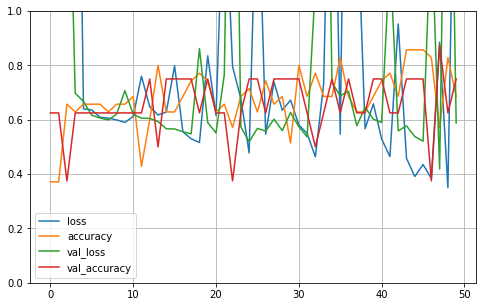

In [21]:
pd.DataFrame(model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

1. val_accuracy = 75 %
2. test_accuracy needs to be evaluated with test data